<a href="https://colab.research.google.com/github/cpvivek/Onlie-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation__Vivek_CP_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

#Methodology

RFM: Recency Frequency and Monetary Value.

RFM is a common market research methodology used to segment the customer base. It makes use of Recency (How recent the last purchase was?), Frequency (How frequent are the purchases?) and Monetory value (Monetory value of the purchase) and condenses them into a score which can further be used to create different segments so that the company can focus accordingly on these segments. 

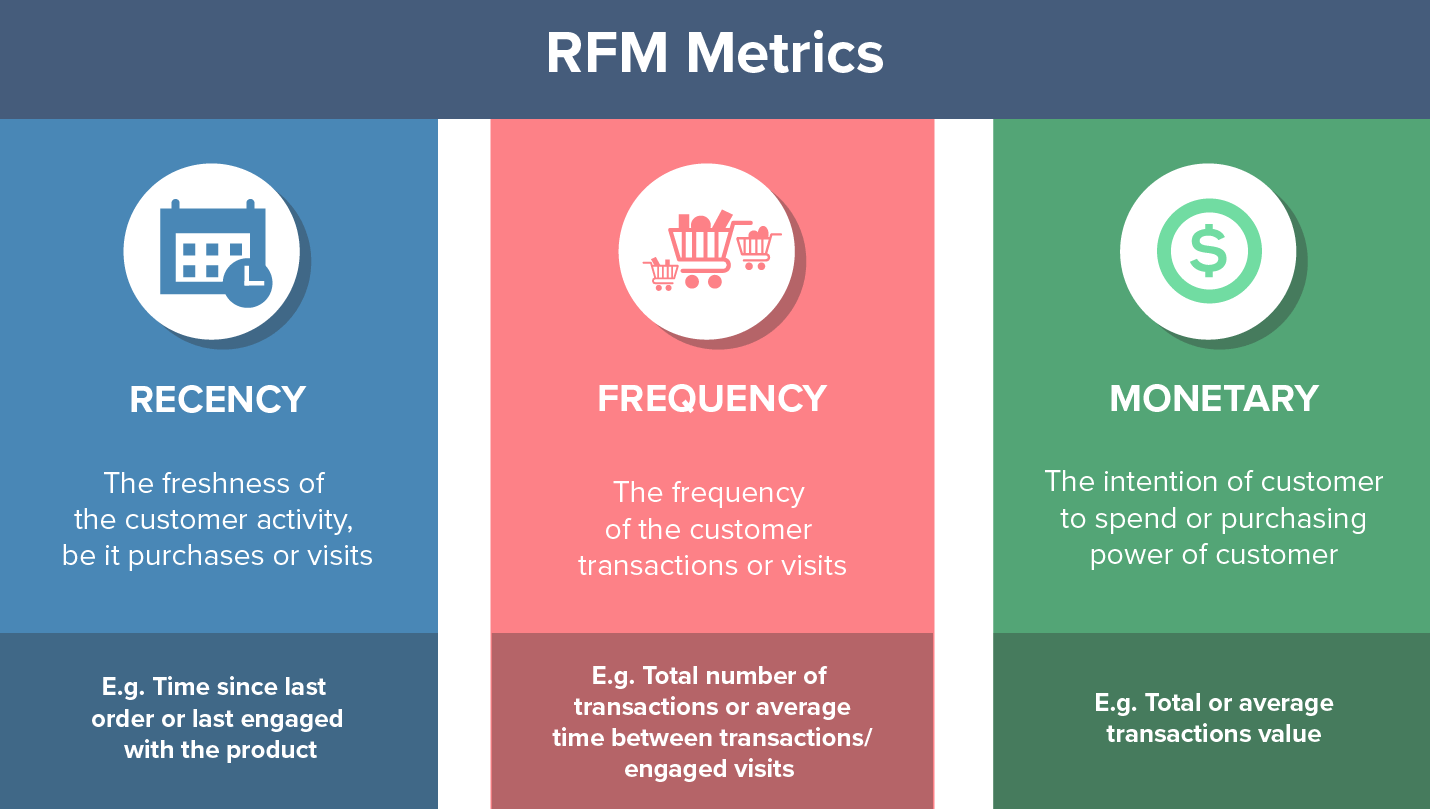

This will be coupled with K means clustering to arrive at the clusters.

References:

[Clevertap](https://clevertap.com/blog/rfm-analysis/)

[AIUniversity YouTube Chanel](https://www.youtube.com/channel/UCv6Uw36LRbYnX4HDxKPguKg)

#Data Exploration

In [1]:
#importing essential datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#reading file
df=pd.read_csv('/content/drive/MyDrive/Alma Better Pro/Alma Better Pro Program/Module 4: Machine Learning/Data Sets/Online Retail.csv')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 8.26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 8.26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 8.26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 8.26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Null Values**

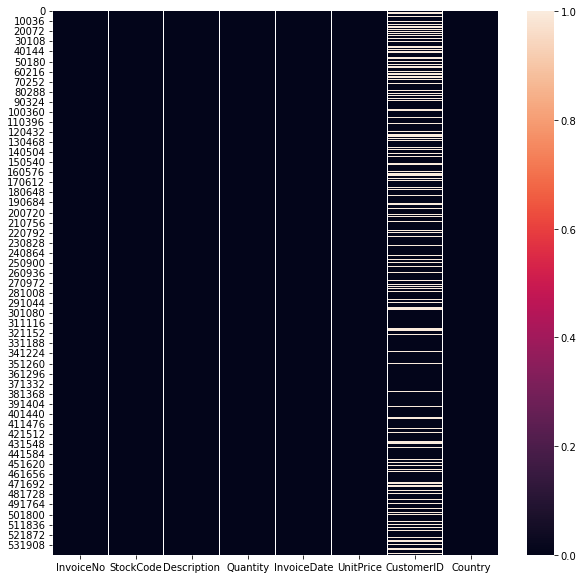

In [8]:
null_values=df.isnull()
plt.figure(figsize=(10,10))
sns.heatmap(null_values)

There is an abundant oncentratio of null values in CustomerID. We can go ahead and drop this null values since CustomerID as it is, wouldn't contribute to segmenting the customers anyway

In [9]:
df.dropna(inplace=True)

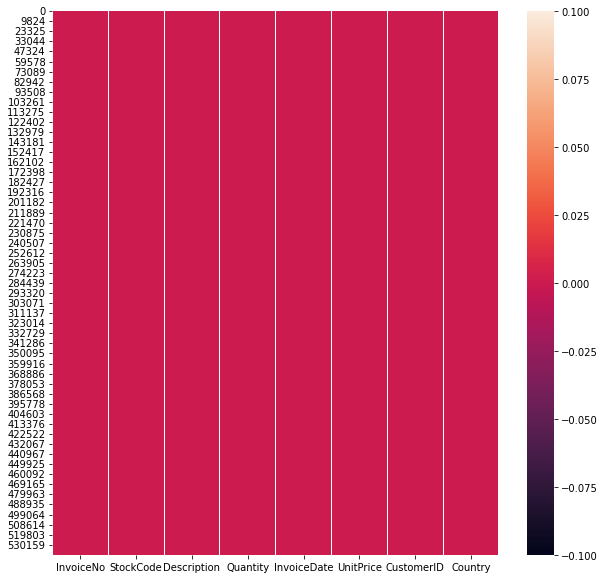

In [10]:
null_values=df.isnull()
plt.figure(figsize=(10,10))
sns.heatmap(null_values)

Our dataset is free of null values now.

In [11]:
df.shape

(406829, 8)

We have come down from 541909 to 406829 rows. Since the number still is quite high, it shouldn't be a problem.

Let's look into the features we have in hand

**Description**

In [12]:
df['Description'].unique

<bound method Series.unique of 0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 406829, dtype: object>

In [13]:
len(df['Description'].unique())

3896

We have 3896 products with distinct descriptions

**Quantity**

In [14]:
df['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     72,    200,    600,
          480,     -6,     14,     -2,     -4,     -5,     -7,     -3,
           11,     70,    252,     60,    216,    384,     27,    108,
           52,  -9360,     75,    270,     42,    240,     90,    320,
           17,   1824,    204,     69,    -36,   -192,   -144,    160,
         2880,   1400,     19,     39,    -48,    -50,     56,     13,
         1440,     -8,     15,    720,    -20,    156,    324,     41,
          -10,    -72,    -11,    402,    378,    150,    300,     22,
           34,    408,    972,    208,   1008,     26,   1000,    -25,
         1488,    250,   1394,    400,    110,    -14,     37,    -33,
      

We can observe some negative values in the quantity. These might be instances where customers return the products, but I can't be sure and the dataset description doesn't mention about same. So for sake of simplicity I'd be removing these instances and keep only quantities greater than 0.

In [15]:
df=df[df.Quantity>0]

In [16]:
df.shape

(397924, 8)

We have come down to 397924 rows now

**Invoice Date**

In [17]:
df['InvoiceDate']

0          01-12-2010 8.26
1          01-12-2010 8.26
2          01-12-2010 8.26
3          01-12-2010 8.26
4          01-12-2010 8.26
                ...       
541904    09-12-2011 12.50
541905    09-12-2011 12.50
541906    09-12-2011 12.50
541907    09-12-2011 12.50
541908    09-12-2011 12.50
Name: InvoiceDate, Length: 397924, dtype: object

The data in hand is from 1-12-2010 to 9-12-2011. 
Let's create Year month and date column as well

In [18]:
#Removing the time from invoice date to be able to convert string type to datetime object
df['InvoiceDate']=df['InvoiceDate'].apply(lambda x: x[:][:-5])

In [19]:
#convering to datetime object
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [20]:
df['Month']=df['InvoiceDate'].dt.month
df['Day']=df['InvoiceDate'].dt.day
df['Year']=df['InvoiceDate'].dt.year

Now we can look into sales in different months

In [21]:
monthly_activity=df.groupby('Month')['CustomerID'].count().reset_index().rename(columns={'CustomerID':'CustomerCount'})
monthly_activity

,Month,CustomerCount
0,1,27096
1,2,24747
2,3,28584
3,4,27276
4,5,32574
5,6,34482
6,7,33378
7,8,31555
8,9,39615
9,10,44432


In [22]:
px.line(monthly_activity,x="Month",y="CustomerCount",title='Customer activity over the months')

We can see that month of november accounts for highest activity. The numbers in december might have gone down owing to lack of data.

We can add another column depicting the value churned (Sales) from customer in a single transaction as product of quantity and Price

In [23]:
df['Sales']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12,2.55,17850.0,United Kingdom,1,12,2010,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,2010,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12,2.75,17850.0,United Kingdom,1,12,2010,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,2010,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12,3.39,17850.0,United Kingdom,1,12,2010,20.34


In [24]:
country_sales=df.groupby('Country')['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
country_sales

,Country,Sales
35,United Kingdom,7308391.554
23,Netherlands,285446.340
10,EIRE,265545.900
14,Germany,228867.140
13,France,209024.050
0,Australia,138521.310
30,Spain,61577.110
32,Switzerland,56443.950
3,Belgium,41196.340
31,Sweden,38378.330


In [25]:
px.bar(country_sales,x="Country",y="Sales",title="Sales in different Countries")

The company has highest sales in UK followed by Netherlands, EIRE, Germany, France, Australia, Spain and negligible contributions by rest of the countries.

#RFM analysis:

Let's derive recency frequency and monetary value features from the dataset.

## Monetary Value

In [71]:
monetary_value=df.groupby('CustomerID')['Sales'].sum().reset_index().rename(columns={'Sales':'Monetary'})
monetary_value

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


There are some obvious instances of outliers here. We'll deal with them all once our final dataset is ready.

##Frequency


In [27]:
cust_frequency=df.groupby('CustomerID')['Sales'].count().reset_index().rename(columns={'Sales':'Frequency'})
cust_frequency

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


##Recency

In [28]:
recency=df.groupby('CustomerID')['InvoiceDate'].max().reset_index().rename(columns={'InvoiceDate':'LatestDate'})
import datetime as dt
last_date=df['InvoiceDate'].max()
recency['Recency']=last_date-recency['LatestDate']
recency.drop('LatestDate',axis=1,inplace=True)
recency['Recency']=recency['Recency'].astype('timedelta64[D]')

##Merging

In [72]:
RFM_df=recency.merge(cust_frequency,on='CustomerID',how='right')
RFM_df=RFM_df.merge(monetary_value ,on='CustomerID',how='right')
RFM_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326.0,1,77183.60
1,12347.0,40.0,182,4310.00
2,12348.0,76.0,31,1797.24
3,12349.0,19.0,73,1757.55
4,12350.0,311.0,17,334.40
...,...,...,...,...
4334,18280.0,160.0,10,180.60
4335,18281.0,4.0,7,80.82
4336,18282.0,216.0,12,178.05
4337,18283.0,10.0,756,2094.88


#Outlier Treatment

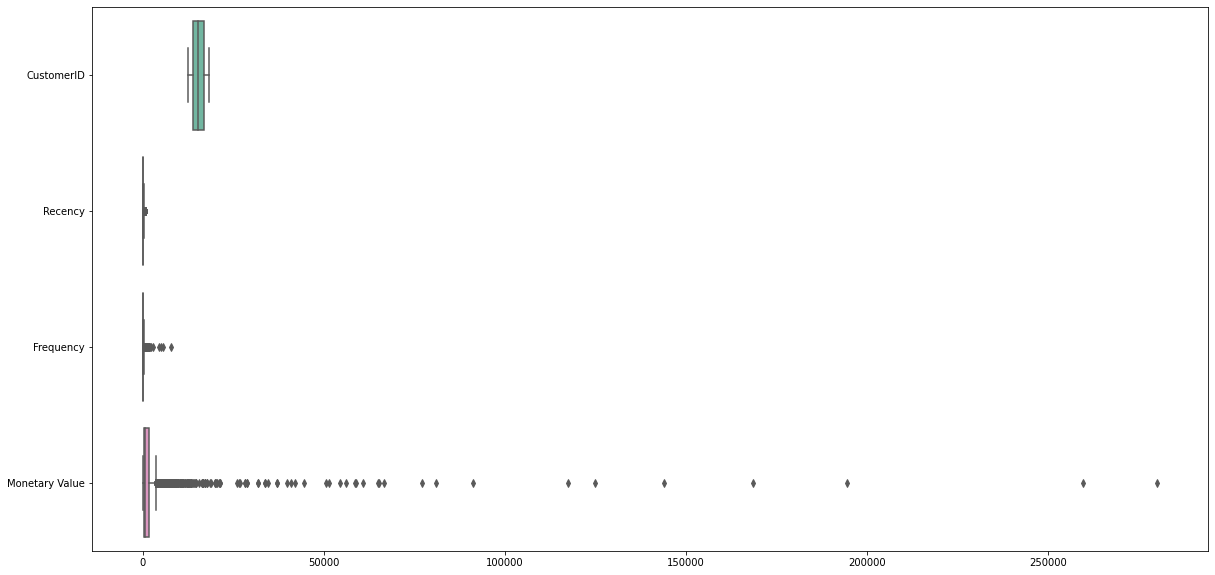

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(data=RFM_df,orient='h',palette='Set2')

plt.show()



The major issue is in monetary value.
I can use the IQR or other such methods to remove the outliers but that will result in removal of a large number of observations. We can see that the distribution of monetary values is more or less uniform in anture upto a value of 100,000. So I'll just go ahead and place a cap of 100000 monetory value and weed oout rest of them.

Outliers in frequency and recency is not much of a matter of concern


In [73]:
RFM_df=RFM_df[RFM_df['Monetary']<100000]

Now we can go ahead and creat Recency, Frequency and Monetary Scores. 
I'll use 4 percentile division here. 1 is the best score and 4 the worst.

**Recency**: Lower the recency better the score. Recency above 25 percentile would be assigned score of 1 and recency below 75th percentile would be assigned score 4. 

**Frequency**: Higher the frequency, better the score. Top 25 percentile frequencies would be assigned the score of 1 and least frequent the score of 4.

**Monetary Value**: Higher the Monetary value, better the score. Top 25 percentile monetary score would be assigned score of 1 and least 25 percentile values would be assigned score of 4.

These scores would be summed up to arrive at final RFM score.

RFM score= R+F+M.

In [74]:
quantiles= RFM_df.quantile(q=[0.25,0.5,0.75])
quantiles.drop('CustomerID',axis=1,inplace=True)

In [75]:
quantiles=quantiles.to_dict()
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.0, 0.5: 671.865, 0.75: 1659.4724999999999},
 'Recency': {0.25: 22.0, 0.5: 61.0, 0.75: 162.0}}

In [76]:
def R_Scoring(a,b,c):
    if a <= c[b][0.25]:
        return 1
    elif a <= c[b][0.50]:
        return 2
    elif a <= c[b][0.75]: 
        return 3
    else:
        return 4
    
def FM_Scoring(a,b,c):
    if a <= c[b][0.25]:
        return 4
    elif a <= c[b][0.50]:
        return 3
    elif a <= c[b][0.75]: 
        return 2
    else:
        return 1

In [79]:
RFM_df.loc[:,'R'] = RFM_df.loc[:,'Recency'].apply(R_Scoring, args=('Recency',quantiles,))
RFM_df.loc[:,'F'] = RFM_df.loc[:,'Frequency'].apply(FM_Scoring, args=('Frequency',quantiles,))
RFM_df.loc[:,'M'] = RFM_df.loc[:,'Monetary'].apply(FM_Scoring, args=('Monetary',quantiles,))
RFM_df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,326.0,1,77183.60,4,4,1
1,12347.0,40.0,182,4310.00,2,1,1
2,12348.0,76.0,31,1797.24,3,3,1
3,12349.0,19.0,73,1757.55,1,2,1
4,12350.0,311.0,17,334.40,4,4,3


In [81]:
RFM_df.loc[:,'RFM_score']=RFM_df.loc[:,'R']+RFM_df.loc[:,'F']+RFM_df.loc[:,'M']
RFM_df

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score
0,12346.0,326.0,1,77183.60,4,4,1,9
1,12347.0,40.0,182,4310.00,2,1,1,4
2,12348.0,76.0,31,1797.24,3,3,1,7
3,12349.0,19.0,73,1757.55,1,2,1,4
4,12350.0,311.0,17,334.40,4,4,3,11
...,...,...,...,...,...,...,...,...
4334,18280.0,160.0,10,180.60,3,4,4,11
4335,18281.0,4.0,7,80.82,1,4,4,9
4336,18282.0,216.0,12,178.05,4,4,4,12
4337,18283.0,10.0,756,2094.88,1,1,1,3


In [37]:
Loyalty_Level = ['Grade-1', 'Grade-2', 'Grade-3', 'Grade-4']
Score_cuts = pd.qcut(RFM_df.RFM_score, q = 4, labels = Loyalty_Level)#
RFM_df['Loyalty_Level'] = Score_cuts.values
RFM_df.reset_index().head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,CustomerID,Recency,Frequency,Monetary Value,R,F,M,RFM_score,Loyalty_Level
0,0,12346.0,326.0,1,77183.60,4,4,1,9,Grade-3
1,1,12347.0,40.0,182,4310.00,2,1,1,4,Grade-1
2,2,12348.0,76.0,31,1797.24,3,3,1,7,Grade-2
3,3,12349.0,19.0,73,1757.55,1,2,1,4,Grade-1
4,4,12350.0,311.0,17,334.40,4,4,3,11,Grade-4


In a way we already have segmented our customers using RFM. 

Grade 1 loyalty level is the highest. These are the most valuable customers. While Grade 4 being the least contributing/valuable bunch to the company. We'll discuss upon their characterestics later on.

In [38]:
RFM_df.rename(columns={'Monetary Value':'Monetary'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [39]:
RFM_df[(RFM_df.Monetary < 50000) & (RFM_df.Frequency < 2000)]

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score,Loyalty_Level
1,12347.0,40.0,182,4310.00,2,1,1,4,Grade-1
2,12348.0,76.0,31,1797.24,3,3,1,7,Grade-2
3,12349.0,19.0,73,1757.55,1,2,1,4,Grade-1
4,12350.0,311.0,17,334.40,4,4,3,11,Grade-4
5,12352.0,73.0,85,2506.04,3,2,1,6,Grade-2
...,...,...,...,...,...,...,...,...,...
4334,18280.0,160.0,10,180.60,3,4,4,11,Grade-4
4335,18281.0,4.0,7,80.82,1,4,4,9,Grade-3
4336,18282.0,216.0,12,178.05,4,4,4,12,Grade-4
4337,18283.0,10.0,756,2094.88,1,1,1,3,Grade-1


In [41]:
fig = px.scatter_3d(RFM_df, x = 'Recency', 
                    y = 'Frequency', 
                    z = 'Monetary',
                    color = 'Loyalty_Level')

fig.show()

#K Mean Clustering

In [51]:
RFM_df[RFM_df['Recency']<=0]

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score,Loyalty_Level
30,12381.0,0.0,87,1845.31,1,2,1,4,Grade-1
79,12444.0,0.0,177,5005.46,1,1,1,3,Grade-1
137,12518.0,0.0,124,2056.89,1,1,1,3,Grade-1
165,12553.0,0.0,191,3692.28,1,1,1,3,Grade-1
177,12569.0,0.0,188,4124.69,1,1,1,3,Grade-1
...,...,...,...,...,...,...,...,...,...
4083,17934.0,0.0,21,704.25,1,3,2,6,Grade-2
4252,18171.0,0.0,54,1231.31,1,2,2,5,Grade-1
4298,18229.0,0.0,164,7276.90,1,1,1,3,Grade-1
4332,18277.0,0.0,8,110.38,1,4,4,9,Grade-3


In [52]:
RFM_df[RFM_df['Monetary']<=0]

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score,Loyalty_Level
685,13256.0,15.0,1,0.0,1,4,4,9,Grade-3


We've got 71 rows with Recency Values as 0 and 1 row with Monetary value as 0. We need to get rid of the 0s here, so that further log transformations or other such operations run smoothly.

In [82]:
def zero_eliminator(x):
  if x<=0:
    x=1
  else:
    pass
  return x 

In [83]:
RFM_df.loc[: , 'Recency']=RFM_df.loc[:,'Recency'].apply(zero_eliminator)
RFM_df.loc[: , 'Monetary']=RFM_df.loc[:,'Monetary'].apply(zero_eliminator)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Distribution of R, F and M

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



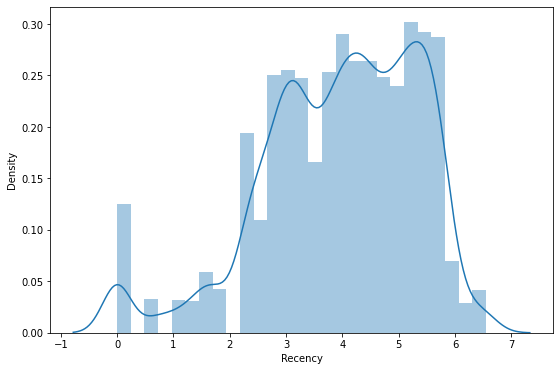

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



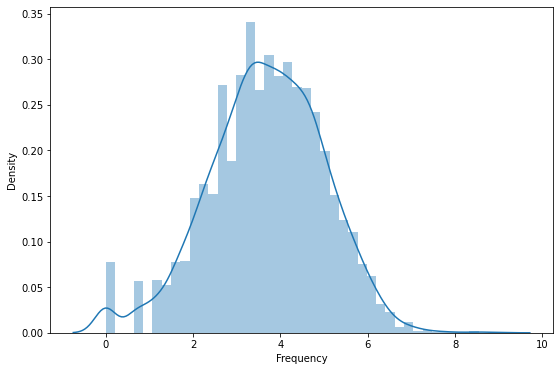

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



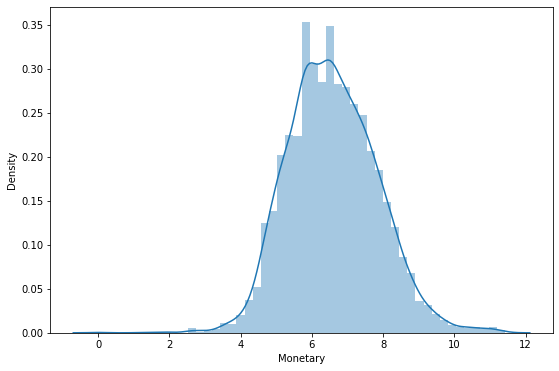

In [87]:
for col in ['Recency','Frequency','Monetary']:
  plt.figure(figsize=(9,6))
  sns.distplot(RFM_df[col])
  plt.show()

We can see that these three distribution are heavily skewed to the right. Let's apply log transformation to bring the distribution closer to normal.

In [85]:
for col in ['Recency','Frequency','Monetary']:
  RFM_df[col]=np.log(RFM_df[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



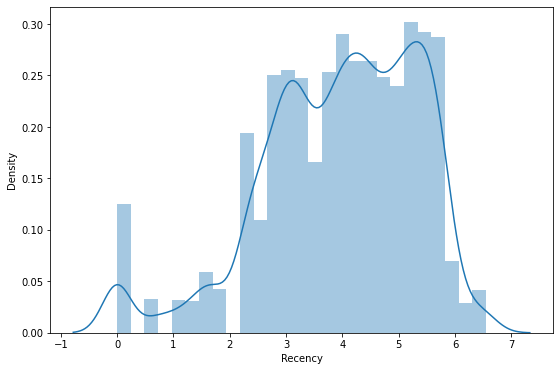

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



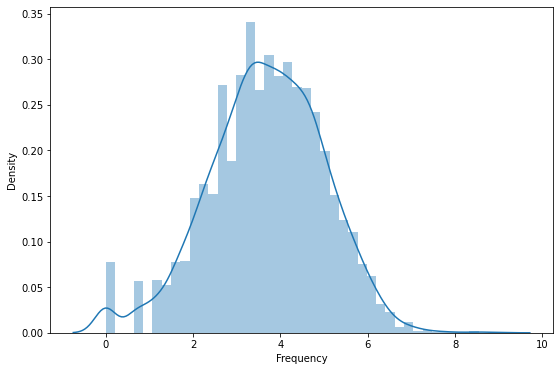

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



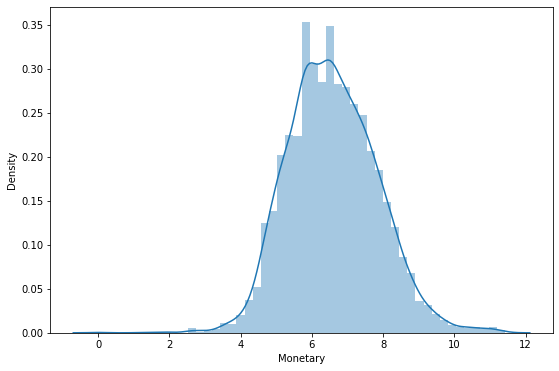

In [88]:
for col in ['Recency','Frequency','Monetary']:
  plt.figure(figsize=(9,6))
  sns.distplot(RFM_df[col])
  plt.show()

After log transformation, the distribution approximates normal distribution much more closely.

In [89]:
RFM_df

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_score
0,12346.0,5.786897,0.000000,11.253942,4,4,1,9
1,12347.0,3.688879,5.204007,8.368693,2,1,1,4
2,12348.0,4.330733,3.433987,7.494007,3,3,1,7
3,12349.0,2.944439,4.290459,7.471676,1,2,1,4
4,12350.0,5.739793,2.833213,5.812338,4,4,3,11
...,...,...,...,...,...,...,...,...
4334,18280.0,5.075174,2.302585,5.196285,3,4,4,11
4335,18281.0,1.386294,1.945910,4.392224,1,4,4,9
4336,18282.0,5.375278,2.484907,5.182064,4,4,4,12
4337,18283.0,2.302585,6.628041,7.647252,1,1,1,3
